# Maryland Troublemakers- Traffic Violation Data Analysis

### Data Sourced from Montgomerty County, Maryland of all electronic traffic violations. Using the vehicle data and the information that describes attributes of the violation and the offender, we can assess a variety of questions categorizing what car brands and their drivers are up to what kind of trouble. 

## Data Loading and Cleaning 

In [2]:
import numpy as np
import pandas as pd                # to import data
import seaborn as sns              # to visualize
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Traffic_Violations.csv')
df.isnull().sum()                   # total missing values in each var


SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            720509
Search Disposition         1814062
Search Outcome              739777
Search Reason              1814062
Search Reason For Stop      720787
Search Type                1814070
Search Arrest Reason       1840757
State                           59
VehicleType                      0
Year                

In [10]:
## Dropping unnecessary Columns that have excessive missing values
df.drop(df.columns[[0,2,3,4,5,7,8,19,20,21,22,23,24,25,31,34,42]], axis=1,inplace=True)
df.isnull().sum()  
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886923 entries, 0 to 1898950
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date Of Stop             object 
 1   Location                 object 
 2   Accident                 object 
 3   Belts                    object 
 4   Personal Injury          object 
 5   Property Damage          object 
 6   Fatal                    object 
 7   Commercial License       object 
 8   HAZMAT                   object 
 9   Commercial Vehicle       object 
 10  Alcohol                  object 
 11  Work Zone                object 
 12  State                    object 
 13  VehicleType              object 
 14  Year                     float64
 15  Make                     object 
 16  Model                    object 
 17  Violation Type           object 
 18  Charge                   object 
 19  Contributed To Accident  bool   
 20  Race                     object 
 21  Gender  

In [12]:
#Standardizing User input car makes to major brands 
Make = df["Make"]
Toyota = Make.str.contains("TOY")
Honda = Make.str.contains("HON")
Mazda = Make.str.contains("MAZ")|Make.str.contains("MZD")
Nissan = Make.str.contains("NISS")
Subaru = Make.str.contains("SUB")
Infiniti = Make.str.contains("INF")
Lexus = Make.str.contains("LEX")
Acura = Make.str.contains("AC")
Hyundai = Make.str.contains("HYUN")
Kia = Make.str.contains("KIA")
Dodge = Make.str.contains("DOD")
Chevy = Make.str.contains("CH")
Ford = Make.str.contains("FOR")
Volkswagen = Make.str.contains("VOLK")|Make.str.contains("WAG")
Mercedes = Make.str.contains("MER")|Make.str.contains("BEN")|Make.str.contains("GLC300")
BMW = Make.str.contains("BMW")
Volvo = Make.str.contains("VOLV")
Tesla = Make.str.contains("TES")



In [13]:
df["Make"] = np.where(Toyota, "TOYOTA", np.where(Honda, "HONDA",np.where(Mazda, "MAZDA", np.where(Nissan, "NISSAN",
np.where(Subaru, "SUBARU", np.where(Infiniti, "INFINITI", np.where(Lexus, "LEXUS", np.where(Acura, "ACURA",np.where(Hyundai, "HYUNDAI",
np.where(Kia, "KIA",np.where(Dodge, "DODGE",np.where(Chevy, "CHEVY",np.where(Ford, "FORD",np.where(Volkswagen, "VOLKSWAGEN",
np.where(Mercedes, "MERCEDES",np.where(BMW, "BMW",np.where(Volvo,"VOLVO",np.where(Tesla,"TESLA", pd.NaT ))))))))))))))))))
df["Make"].tail()

1898946     CHEVY
1898947     HONDA
1898948    TOYOTA
1898949    TOYOTA
1898950     ACURA
Name: Make, dtype: object

#### Removing entries that are not picked up by these major brand variables I created, which leads to a loss of 241,384 cases or about 12.71% of all cases, but still leaving us with a very large and more organized data set from which to analyze. 

In [14]:
df = df.dropna()

In [75]:
df[["Make", "Model"]].head(100)

,Make,Model
0,CHEVY,CRUZ
1,TOYOTA,COROLLA
2,TOYOTA,COROLLA
3,TOYOTA,HB
4,SUBARU,ECLIPSE CROSS
...,...,...
100,BMW,X6
106,HONDA,CRV
107,HONDA,CRV
108,HONDA,CIVIC


In [15]:
df.shape

(1657566, 26)

In [16]:
#Creating a Month Column 
df["Month"] = df['Date Of Stop'].str[0:2]
df["Month"] = df["Month"].astype(int)
df.head(5)

,Date Of Stop,Location,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,...,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Month
0,05/01/2023,BRIGGS CHANEY RD @ COLUMIBA PIKE,No,No,No,No,No,No,No,No,...,Citation,13-401(b1),False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,5
1,11/25/2023,GEORGIA AVE / WEISMAN RD,No,No,No,No,No,No,No,No,...,Citation,13-409(b),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,11
2,11/25/2023,GEORGIA AVE / WEISMAN RD,No,No,No,No,No,No,No,No,...,Citation,13-411(f),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,11
3,11/26/2023,3803 WELLER RD,No,No,No,Yes,No,No,No,No,...,Citation,21-902(a1i),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,11
4,11/25/2023,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,No,No,No,No,No,No,No,No,...,Citation,21-901.1(a),False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,11


### Some light EDA 
##### To assess which brands are misbehaving, we need to narrow our focus to the most important, usable variables. Among the ones in the dataset, the vast majority are Qualitative, which will reduce the variety of graphs and visualizations we can create. The variables I have settled on exploring though are "Accident", "Alcohol" and "Violation Type"  as responses and "Make" and "Race" as explanatory. 

#### Beginning with Alcohol:

In [93]:
#Simple crosstab is useful to see the counts but it will be more useful to get percents in order to make observations
pd.crosstab(index=df['Alcohol'], columns=df['Make'])      


Make,ACURA,BMW,CHEVY,DODGE,FORD,HONDA,HYUNDAI,INFINITI,KIA,LEXUS,MAZDA,MERCEDES,NISSAN,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Alcohol,,,,,,,,,,,,,,,,,,
No,75007,53305,171184,61925,173900,281035,68290,22329,28100,43938,37462,64330,144700,39040,2428,335312,37874,15192
Yes,115,55,363,178,375,276,88,13,40,69,41,61,125,20,0,288,98,10


In [112]:
alc = df[((df['Alcohol'] == 'Yes')) & (df["Make"])]
DUI = pd.crosstab(index=alc['Alcohol'], columns=alc['Make']).sum()      
print(DUI)                        # freq table
beer = (DUI/sum(DUI))                # perc table
print(beer)


Make
ACURA         115
BMW            55
CHEVY         363
DODGE         178
FORD          375
HONDA         276
HYUNDAI        88
INFINITI       13
KIA            40
LEXUS          69
MAZDA          41
MERCEDES       61
NISSAN        125
SUBARU         20
TOYOTA        288
VOLKSWAGEN     98
VOLVO          10
dtype: int64
Make
ACURA         0.051919
BMW           0.024831
CHEVY         0.163883
DODGE         0.080361
FORD          0.169300
HONDA         0.124605
HYUNDAI       0.039729
INFINITI      0.005869
KIA           0.018059
LEXUS         0.031151
MAZDA         0.018510
MERCEDES      0.027540
NISSAN        0.056433
SUBARU        0.009029
TOYOTA        0.130023
VOLKSWAGEN    0.044244
VOLVO         0.004515
dtype: float64


In [84]:
alc = df[(df['Alcohol'] == 'Yes') & (df["Make"])] #creating series that includes makes and instances of drunk driving 
AllViolation = pd.crosstab(index=df['Alcohol'], columns=df['Make']).sum() #Counts of all traffic incidents for each make 
print(AllViolation)
DUI = pd.crosstab(index=alc['Alcohol'], columns=alc['Make']).sum()#Counts of incidents involving alcohol for each make
print(DUI)
tb = pd.DataFrame((DUI/AllViolation)*100) #Creates a series with the (#DUis/#AllViolations)*100 for each brand to give the proportion(%)
                               #of traffic incidents that were DUIs for each make relative to itself, so we can compare which 
                               #brands have the most DUIs relatively. 
tb['Perc'] = tb.iloc[:,0]
print (tb)

tb.dropna()

Make
ACURA          75122
BMW            53360
CHEVY         171547
DODGE          62103
FORD          174275
HONDA         281311
HYUNDAI        68378
INFINITI       22342
KIA            28140
LEXUS          44007
MAZDA          37503
MERCEDES       64391
NISSAN        144825
SUBARU         39060
TESLA           2428
TOYOTA        335600
VOLKSWAGEN     37972
VOLVO          15202
dtype: int64
Make
ACURA         115
BMW            55
CHEVY         363
DODGE         178
FORD          375
HONDA         276
HYUNDAI        88
INFINITI       13
KIA            40
LEXUS          69
MAZDA          41
MERCEDES       61
NISSAN        125
SUBARU         20
TOYOTA        288
VOLKSWAGEN     98
VOLVO          10
dtype: int64
                   0      Perc
Make                          
ACURA       0.153084  0.153084
BMW         0.103073  0.103073
CHEVY       0.211604  0.211604
DODGE       0.286621  0.286621
FORD        0.215177  0.215177
HONDA       0.098112  0.098112
HYUNDAI     0.128696  0.128696
I

,0,Perc
Make,,
ACURA,0.153084,0.153084
BMW,0.103073,0.103073
CHEVY,0.211604,0.211604
DODGE,0.286621,0.286621
FORD,0.215177,0.215177
HONDA,0.098112,0.098112
HYUNDAI,0.128696,0.128696
INFINITI,0.058186,0.058186
KIA,0.142146,0.142146


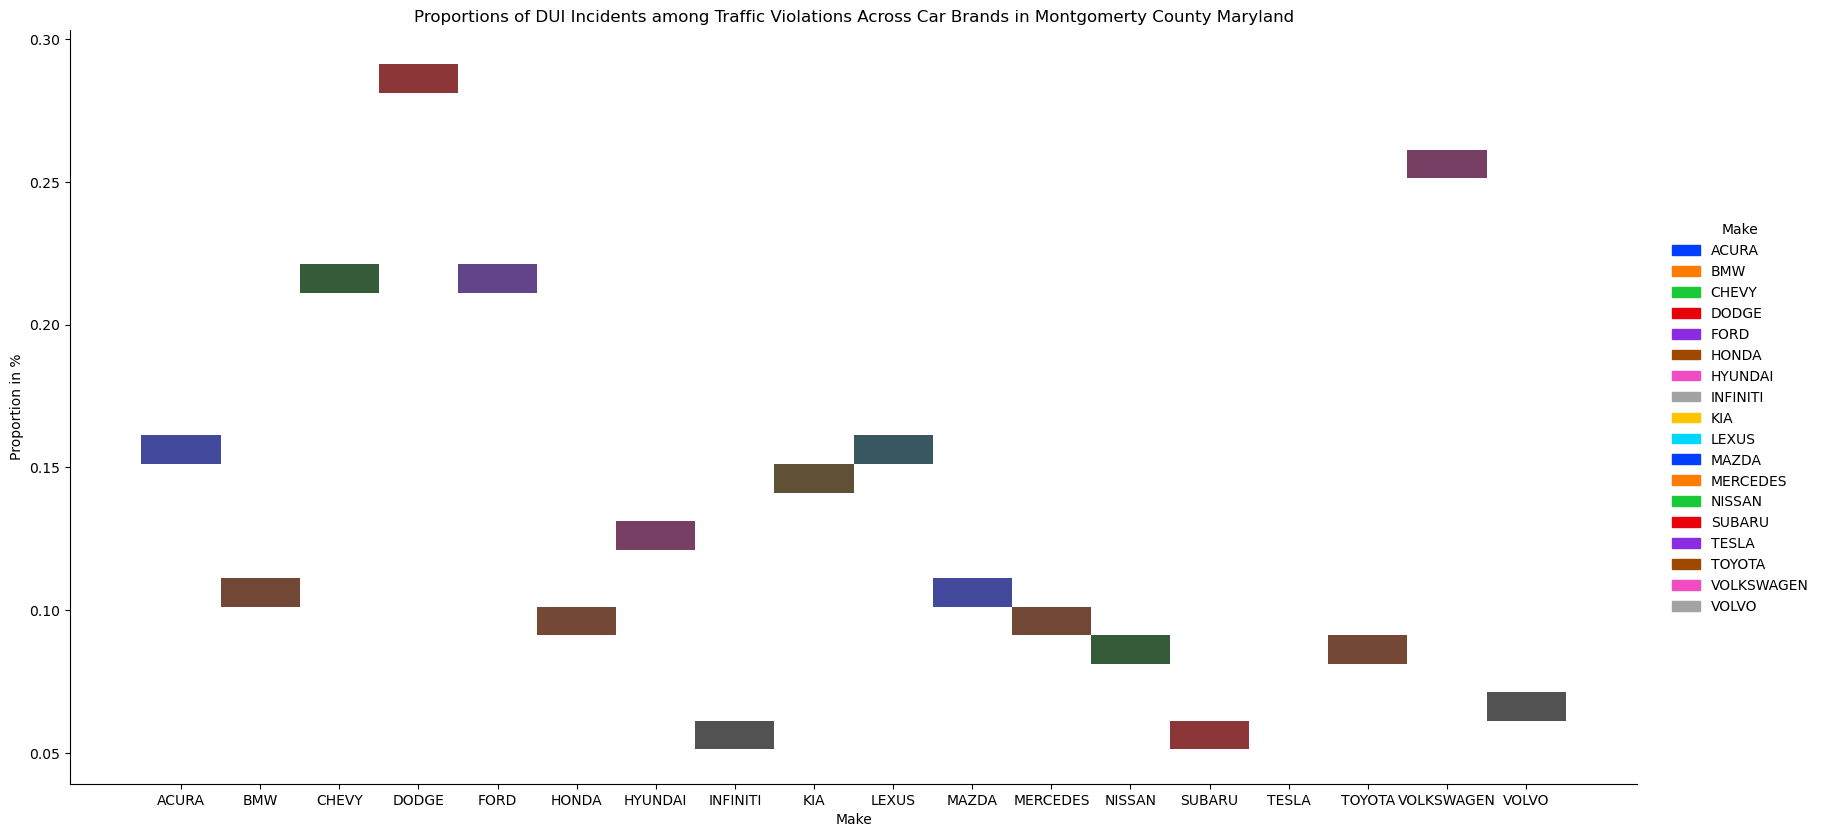

In [87]:
sns.color_palette("tab10")
ax = sns.displot(data=tb, x= 'Make', y = 'Perc', hue= "Make", height=8.27, binwidth=.01,  aspect=12.7/6.27, palette = 'bright' ).set(title='Proportions of DUI Incidents among Traffic Violations Across Car Brands in Montgomerty County Maryland', ylabel= 'Proportion in %')

#interesting observations: Seemingly brands that have a more reckless reputation like Dodge and Volkswagon have the highest
#proportions, albeit still very low suggesting that DUI's are not extremely common across any brands, however Chevy and Ford
#are the next highest which maybe suggests some of these drivers are less responsible that those that pick their Japaneses counterparts. 
#Certainly issues of bias could be at play in these police stops with Luxury brands like BMW, Infiniti and Mercedes perhaps being targeted less
#for stops and DUI checks 
#Interestingly the luxury analogues of Toyota and Honda, Lexus and Acura respectively, had higher rates than their parent brands
#which can be rationalized as these vehicles are generally more powerful and flashy but still affordable, perfect to attract
#a more risk taking and younger customerbase that might make more poor decsisions like driving under the influence.
#Some of the lowest percents also come from very safety oriented brands like Subaru and Volvo showing their customers
#have taken their safety message to heart 


In [169]:
pd.crosstab(index=df['Accident'], columns=df['Make'])      

Make,ACURA,BMW,CHEVY,DODGE,FORD,HONDA,HYUNDAI,INFINITI,KIA,LEXUS,MAZDA,MERCEDES,NISSAN,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Accident,,,,,,,,,,,,,,,,,,
No,73129,52108,167012,60444,168966,273129,66630,21936,27497,42928,36598,62926,140760,37947,2354,325759,37053,14786
Yes,1993,1252,4535,1659,5309,8182,1748,406,643,1079,905,1465,4065,1113,74,9841,919,416


In [71]:
pd.crosstab(index=df['Violation Type'], columns=df['Race'])      

Race,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,OTHER,WHITE
Violation Type,,,,,,
Citation,35652,234729,193190,1190,38076,225246
ESERO,4812,22753,20713,194,4478,21511
SERO,28,214,225,0,39,251
Warning,58356,265891,162486,1593,62735,303204


In [60]:
acc = df[(df['Accident'] == 'Yes') & (df["Make"])]
pp2 = pd.crosstab(index=acc['Accident'], columns=acc['Make']).sum()#Counts of accidents across makes
print(pp2)
tb2 = pd.DataFrame((pp2/AllViolation)*100) #Creates a series with the (#ofAllIncidents/#ofDUIs)*100 for each brand to give the proportion(%)
print(tb2)
tb2['Perc'] = tb2.iloc[:,0]
print (tb2)


Make
ACURA         1993
BMW           1252
CHEVY         4535
DODGE         1659
FORD          5309
HONDA         8182
HYUNDAI       1748
INFINITI       406
KIA            643
LEXUS         1079
MAZDA          905
MERCEDES      1465
NISSAN        4065
SUBARU        1113
TESLA           74
TOYOTA        9841
VOLKSWAGEN     919
VOLVO          416
dtype: int64
                   0
Make                
ACURA       2.653018
BMW         2.346327
CHEVY       2.643590
DODGE       2.671369
FORD        3.046335
HONDA       2.908525
HYUNDAI     2.556378
INFINITI    1.817205
KIA         2.285004
LEXUS       2.451883
MAZDA       2.413140
MERCEDES    2.275163
NISSAN      2.806836
SUBARU      2.849462
TESLA       3.047776
TOYOTA      2.932360
VOLKSWAGEN  2.420204
VOLVO       2.736482
                   0      Perc
Make                          
ACURA       2.653018  2.653018
BMW         2.346327  2.346327
CHEVY       2.643590  2.643590
DODGE       2.671369  2.671369
FORD        3.046335  3.046335
HON

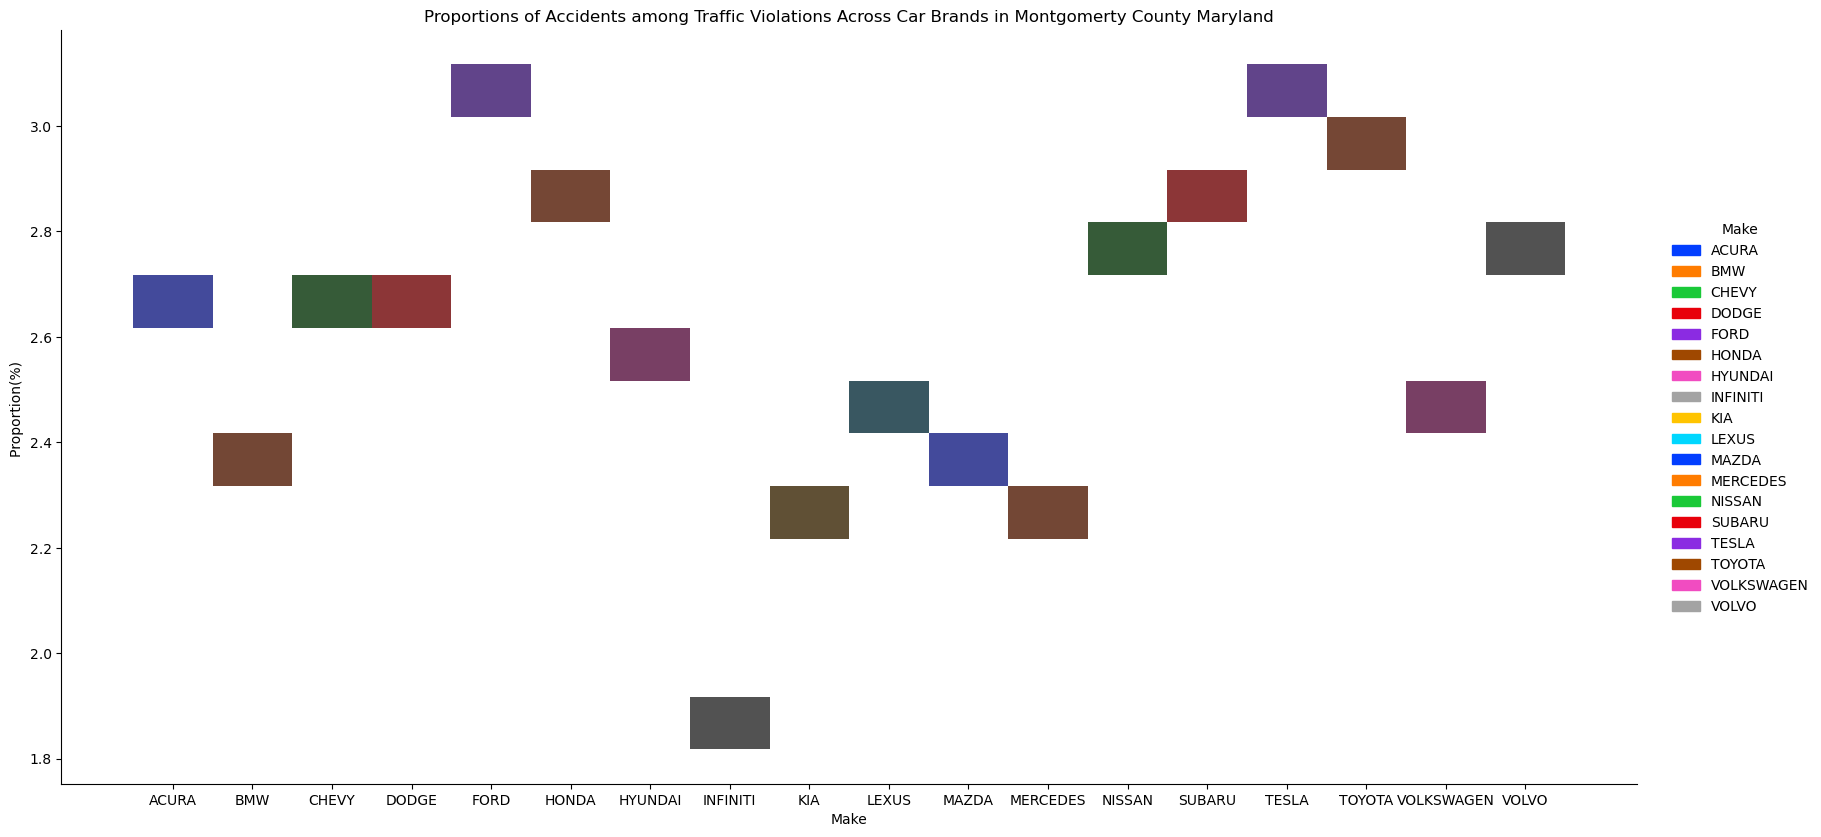

In [82]:
sns.color_palette("tab10")
ax = sns.displot(data=tb2, x= 'Make',y= "Perc"   , hue= "Make",binwidth=.1, height=8.27, aspect=12.7/6.27, palette = 'bright' ).set(title='Proportions of Accidents among Traffic Violations Across Car Brands in Montgomerty County Maryland', ylabel= 'Proportion(%) ')


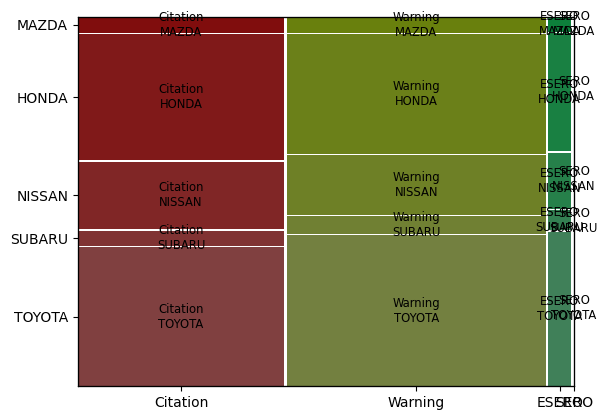

In [50]:
from statsmodels.graphics.mosaicplot import mosaic

Japanese = df[(df["Make"] == ("TOYOTA"))| ((df["Make"]) == ("HONDA"))|((df["Make"]) == ("NISSAN"))|((df["Make"]) == ("MAZDA"))
             |((df["Make"]) == ("SUBARU"))]
mosaic(data = Japanese, index =['Violation Type', 'Make'])
plt.show()

In [26]:
citation = df[(df['Violation Type']=="Citation")]
pd1 = pd.crosstab(index=citation['Violation Type'], columns=df['Make']).sum()      
print(pd1)                        # freq table
perc1 = (pd1/sum(pd1))                # perc table
print(perc1)
prop1 = pd1/AllViolation  # proportion of violations that result in a citation
print(prop1)

Make
ACURA          34597
BMW            25003
CHEVY          81025
DODGE          30440
FORD           82070
HONDA         122358
HYUNDAI        27300
INFINITI       10370
KIA            11378
LEXUS          18308
MAZDA          15777
MERCEDES       29732
NISSAN         65766
SUBARU         15083
TESLA            725
TOYOTA        134829
VOLKSWAGEN     16780
VOLVO           6542
dtype: int64
Make
ACURA         0.047518
BMW           0.034341
CHEVY         0.111285
DODGE         0.041808
FORD          0.112721
HONDA         0.168055
HYUNDAI       0.037496
INFINITI      0.014243
KIA           0.015627
LEXUS         0.025145
MAZDA         0.021669
MERCEDES      0.040836
NISSAN        0.090328
SUBARU        0.020716
TESLA         0.000996
TOYOTA        0.185184
VOLKSWAGEN    0.023047
VOLVO         0.008985
dtype: float64
Make
ACURA         0.460544
BMW           0.468572
CHEVY         0.472320
DODGE         0.490153
FORD          0.470922
HONDA         0.434956
HYUNDAI       0.399251
INFI

In [27]:
warn = df[(df['Violation Type']=="Warning")]
pd2 = pd.crosstab(index=warn['Violation Type'], columns=df['Make']).sum()      
print(pd2)                        # freq table
perc2 = (pd2/sum(pd2))                # perc table
print(perc2)
prop2 = pd2/AllViolation  # proportion of violations that result in a warning
print(prop2)

Make
ACURA          37349
BMW            26638
CHEVY          82017
DODGE          28822
FORD           84728
HONDA         146075
HYUNDAI        37273
INFINITI       11214
KIA            15487
LEXUS          24484
MAZDA          20091
MERCEDES       32260
NISSAN         72904
SUBARU         21796
TESLA           1672
TOYOTA        183939
VOLKSWAGEN     19515
VOLVO           8001
dtype: int64
Make
ACURA         0.043721
BMW           0.031182
CHEVY         0.096009
DODGE         0.033739
FORD          0.099182
HONDA         0.170995
HYUNDAI       0.043632
INFINITI      0.013127
KIA           0.018129
LEXUS         0.028661
MAZDA         0.023518
MERCEDES      0.037763
NISSAN        0.085341
SUBARU        0.025514
TESLA         0.001957
TOYOTA        0.215318
VOLKSWAGEN    0.022844
VOLVO         0.009366
dtype: float64
Make
ACURA         0.497178
BMW           0.499213
CHEVY         0.478102
DODGE         0.464100
FORD          0.486174
HONDA         0.519265
HYUNDAI       0.545102
INFI

1     138106
2     143012
3     155245
4     143202
5     146084
6     127169
7     133024
8     132038
9     134256
10    134969
11    136723
12    133738
Name: Month, dtype: int64


Text(0, 0.5, '# of Traffic Violations')

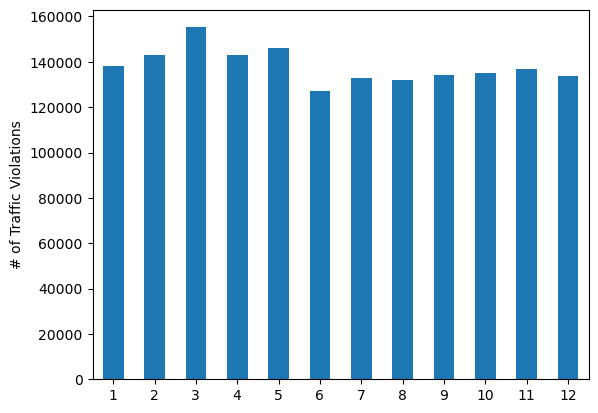

In [68]:
df_sorted = df.sort_values(by = 'Month', ascending=True)
tb = df_sorted['Month'].value_counts(sort=False) # value counts
print(tb)
tb.plot.bar(rot=0) # bar chart
plt.ylabel("Month")
plt.ylabel("# of Traffic Violations")

## Number of Traffic Violations by Month
